In [229]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
import seaborn as sns
import category_encoders as ce
from sklearn.preprocessing import LabelBinarizer
#import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor

# To load Input data

In [230]:
dataset_test = pd.read_csv('tcd-ml-1920-group-income-train.csv')
dataset_pred = pd.read_csv('tcd-ml-1920-group-income-test.csv')
store_data = dataset_pred.filter(['Instance'], axis=1)
dataset_test.columns = dataset_test.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
dataset_pred.columns = dataset_pred.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

dataset_test.rename(columns={'Work_Experience_in_Current_Job_[years]': 'Work_Experience_in_Current_Job'}, inplace=True)
dataset_pred.rename(columns={'Work_Experience_in_Current_Job_[years]': 'Work_Experience_in_Current_Job'}, inplace=True)

/home/james/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (2,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/james/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Remove Instance Column

In [231]:
dataset_test = dataset_test.drop('Instance', 1)
dataset_pred = dataset_pred.drop('Instance', 1)
dataset_test.drop(dataset_test.loc[dataset_test['Total_Yearly_Income_[EUR]']==2548791].index, inplace=True)

# Change null to rand value between std dev around mean. Alternate could be panda interpolate


In [232]:
Column_Name_avg = dataset_test['Year_of_Record'].mean()
Column_Name_std = dataset_test['Year_of_Record'].std()
Column_Name_null_count = dataset_test['Year_of_Record'].isnull().sum()
Column_Name_null_random_list = np.random.randint(Column_Name_avg - Column_Name_std, Column_Name_avg + Column_Name_std, size=Column_Name_null_count)
dataset_test['Year_of_Record'][np.isnan(dataset_test['Year_of_Record'])] = Column_Name_null_random_list
dataset_test['Year_of_Record'] = dataset_test['Year_of_Record'].astype(int)

Column_Name_avg = dataset_pred['Year_of_Record'].mean()
Column_Name_std = dataset_pred['Year_of_Record'].std()
Column_Name_null_count = dataset_pred['Year_of_Record'].isnull().sum()
Column_Name_null_random_list = np.random.randint(Column_Name_avg - Column_Name_std, Column_Name_avg + Column_Name_std, size=Column_Name_null_count)
dataset_pred['Year_of_Record'][np.isnan(dataset_pred['Year_of_Record'])] = Column_Name_null_random_list
dataset_pred['Year_of_Record'] = dataset_pred['Year_of_Record'].astype(int)

/home/james/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/james/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


# Filling Gender Nan and other values


In [233]:
dataset_test.Gender = dataset_test.Gender.replace("f", "female")
dataset_test["Gender"].fillna("unknown", inplace = True)
dataset_test.Gender = dataset_test.Gender.replace("0", "unknown")

dataset_pred.Gender = dataset_pred.Gender.replace("f", "female")
dataset_pred["Gender"].fillna("unknown", inplace = True)
dataset_pred.Gender = dataset_pred.Gender.replace("0", "unknown")

# Filling University Degree Nan Values

In [234]:
dataset_test.University_Degree = dataset_test.University_Degree.replace("0", "No")
dataset_test["University_Degree"].fillna("No", inplace = True)

dataset_pred.University_Degree = dataset_pred.University_Degree.replace("0", "No")
dataset_pred["University_Degree"].fillna("No", inplace = True)

# Filling Haircolor Nan Values

In [235]:
dataset_test.Hair_Color = dataset_test.Hair_Color.replace("0", "Unknown")
dataset_test["Hair_Color"].fillna("Unknown", inplace = True)
dataset_test = dataset_test.drop('Hair_Color', 1)

dataset_pred.Hair_Color = dataset_pred.Hair_Color.replace("0", "Unknown")
dataset_pred["Hair_Color"].fillna("Unknown", inplace = True)
dataset_pred = dataset_pred.drop('Hair_Color', 1)

# Filling Profession Nan Values

In [236]:
dataset_test["Profession"].fillna("Unknown", inplace = True)
dataset_pred["Profession"].fillna("Unknown", inplace = True)

# Filling Housing_Situation Corrupt Values

In [237]:
dataset_test["Housing_Situation"] = dataset_test["Housing_Situation"].replace(0,'Unknown')
dataset_test["Housing_Situation"] = dataset_test["Housing_Situation"].replace('0','Unknown')
dataset_test["Housing_Situation"] = dataset_test["Housing_Situation"].replace('nA','Unknown')

dataset_pred["Housing_Situation"] = dataset_pred["Housing_Situation"].replace(0,'Unknown')
dataset_pred["Housing_Situation"] = dataset_pred["Housing_Situation"].replace('0','Unknown')
dataset_pred["Housing_Situation"] = dataset_pred["Housing_Situation"].replace('nA','Unknown')


dataset_test['Satisfation_with_employer'] = dataset_test['Satisfation_with_employer'].fillna(method='ffill')
dataset_pred['Satisfation_with_employer'] = dataset_pred['Satisfation_with_employer'].fillna(method='ffill')

# Convert work Experience in current job to float and replace #NUM! to mean of their Age

In [238]:
dataset_test.Work_Experience_in_Current_Job = dataset_test.Work_Experience_in_Current_Job.replace("#NUM!", None)
dataset_test['Work_Experience_in_Current_Job'] = dataset_test['Work_Experience_in_Current_Job'].astype(float)
dataset_test.value = dataset_test.groupby('Age')['Work_Experience_in_Current_Job'].apply(lambda x: x.fillna(x.median()))
dataset_test.value = dataset_test.Work_Experience_in_Current_Job.fillna(dataset_test.Work_Experience_in_Current_Job.median())

dataset_pred.Work_Experience_in_Current_Job = dataset_pred.Work_Experience_in_Current_Job.replace("#NUM!", None)
dataset_pred['Work_Experience_in_Current_Job'] = dataset_pred['Work_Experience_in_Current_Job'].astype(float)
dataset_pred.value = dataset_pred.groupby('Age')['Work_Experience_in_Current_Job'].apply(lambda x: x.fillna(x.median()))
dataset_pred.value = dataset_pred.Work_Experience_in_Current_Job.fillna(dataset_pred.Work_Experience_in_Current_Job.median())

/home/james/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until
/home/james/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


# Remove EUR in Yearly_Income to make it numerical value 

In [239]:
dataset_test['Yearly_Income_in_addition_to_Salary_e.g._Rental_Income'] = dataset_test['Yearly_Income_in_addition_to_Salary_e.g._Rental_Income'].replace('EUR', '', regex=True).astype(float)
dataset_pred['Yearly_Income_in_addition_to_Salary_e.g._Rental_Income'] = dataset_pred['Yearly_Income_in_addition_to_Salary_e.g._Rental_Income'].replace('EUR', '', regex=True).astype(float)

# Label encoding the categorical columns

In [240]:
for col in dataset_test.dtypes[dataset_test.dtypes == 'object'].index.tolist():
    feat_le = LabelEncoder()
    train_list = dataset_test[col].unique()
    dataset_test.loc[1201,col] = 'other'
    test_list = dataset_pred[col].unique()
    test_replace = list(set(test_list) - set(train_list))
    dataset_pred[col] = dataset_pred[col].replace(test_replace, 'other')
    feat_le.fit(dataset_test[col].unique().astype(str))
    dataset_test[col] = feat_le.transform(dataset_test[col].astype(str))
    dataset_pred[col] = feat_le.transform(dataset_pred[col].astype(str))



### This function takes a string column name and returns a list
### containing indices of dataframe that have outliers in that column
### Refer: https://towardsdatascience.com/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623


In [241]:
def OutlierByColumn(colname):
    rows = dataset_test.shape[0]
    col_std = np.std(dataset_test[colname])
    col_mean = np.mean(dataset_test[colname])
    anomaly_cut_off = col_std * 3
    lower_limit  = col_mean - anomaly_cut_off 
    upper_limit = col_mean + anomaly_cut_off
    anomalies_indices = []
    for i in range(rows):
        ele = dataset_test[colname][i]
        if ele > upper_limit or ele < lower_limit:
            anomalies_indices.append(i)
    return anomalies_indices

# Running outlier

In [242]:
arr1 = OutlierByColumn('Work_Experience_in_Current_Job')
arr2 = OutlierByColumn('Age')
arr3 = OutlierByColumn('Body_Height_[cm]')
arr4 = OutlierByColumn('Yearly_Income_in_addition_to_Salary_e.g._Rental_Income')
arr5 = OutlierByColumn('Size_of_City')

In [243]:
#Union of all lists 
union_index = np.union1d(arr1,arr2)
union_index = np.union1d(union_index,arr3)
union_index = np.union1d(union_index,arr4)
union_index = np.union1d(union_index,arr5)
len(union_index)
dataset_test = dataset_test.drop(union_index)

# Normalise columns

In [244]:
dataset_test = dataset_test.sample(frac=1).reset_index(drop=True)

y = dataset_test['Total_Yearly_Income_[EUR]'].values
dataset_test.drop('Total_Yearly_Income_[EUR]', axis=1, inplace=True)


In [245]:

x = dataset_test.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
dataset_test = pd.DataFrame(x_scaled)
X = dataset_test[dataset_test.columns].values

# View Data

In [246]:
dataset_test.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.506329,0.250,0.802083,0.46875,0.50,0.000000,0.295775,0.390805,0.561241,0.594834,0.00,1.0,0.372881,0.254034
1,0.898734,0.125,0.088542,0.62500,0.00,0.666667,0.478873,0.051724,0.076901,0.701845,0.00,1.0,0.677966,0.000000
2,0.050633,0.875,0.369792,0.59375,0.00,0.666667,0.422535,0.488506,0.187905,0.727675,0.25,0.0,0.440678,0.000000
3,0.721519,0.750,0.895833,0.68750,0.00,0.333333,0.549296,0.390805,0.267165,0.847970,0.00,1.0,0.288136,0.000000
4,0.506329,0.500,0.494792,0.71875,0.25,0.333333,0.661972,0.270115,0.058381,0.596310,0.50,0.0,0.500000,0.000000


In [247]:
y.view()

array([ 36387.11, 124103.01,   2421.29, ...,    823.84,   2709.58,
       192709.31])

In [248]:

X = dataset_test[dataset_test.columns].values

In [249]:
print(y.shape)
print(X.shape)

(995179,)
(995179, 14)


In [250]:
#split 80% of the data to the training set while 20% of the data to test set.
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.1)

In [251]:
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(895661, 14) (99518, 14)
(895661,) (99518,)


In [252]:
dataset_pred.drop('Total_Yearly_Income_[EUR]', axis=1, inplace=True)

x = dataset_pred.values #returns a numpy array
x_scaled = min_max_scaler.transform(x)
dataset_pred = pd.DataFrame(x_scaled)

X_pred = dataset_pred[dataset_pred.columns].values

# KERAS Model

In [278]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras.layers import Dropout
from keras import losses
from keras.layers.convolutional import Conv1D
from keras.layers import Input, Flatten
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

In [279]:
sgd = optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True)
losses = losses.mean_absolute_percentage_error

In [280]:
model = Sequential()
model.add(Dense(1024,kernel_initializer='RandomUniform', input_dim=14, activation= "relu"))
model.add(Dropout(0.2))
model.add(Dense(512,kernel_initializer='normal', activation= "relu"))
model.add(Dropout(0.2))
model.add(Dense(1))

In [281]:
model.compile(loss= losses , optimizer=sgd, metrics=["mean_absolute_error"])

In [282]:
model.build()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_64 (Dense)             (None, 1024)              15360     
_________________________________________________________________
dropout_40 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_65 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_41 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_66 (Dense)             (None, 1)                 513       
Total params: 540,673
Trainable params: 540,673
Non-trainable params: 0
_________________________________________________________________


In [283]:
filepath="weights-improvement-{epoch:02d}-{val_loss:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [290]:
hist = model.fit(X_train, Y_train,
          batch_size=1024, epochs=50,
          validation_split=0.2,shuffle=True,callbacks=callbacks_list)

Train on 716528 samples, validate on 179133 samples
Epoch 1/50
716528/716528 [==============================] - 10s 14us/step - loss: 28.6627 - mean_absolute_error: 22921.0227 - val_loss: 27.3157 - val_mean_absolute_error: 22579.3932

Epoch 00001: val_loss did not improve from 27.27337
Epoch 2/50
716528/716528 [==============================] - 10s 14us/step - loss: 28.6492 - mean_absolute_error: 22902.9688 - val_loss: 27.3286 - val_mean_absolute_error: 22310.9995

Epoch 00002: val_loss did not improve from 27.27337
Epoch 3/50
716528/716528 [==============================] - 10s 14us/step - loss: 28.5622 - mean_absolute_error: 22867.3176 - val_loss: 27.2038 - val_mean_absolute_error: 22634.7244

Epoch 00003: val_loss improved from 27.27337 to 27.20384, saving model to weights-improvement-03-27.20.hdf5
Epoch 4/50
716528/716528 [==============================] - 10s 14us/step - loss: 28.5045 - mean_absolute_error: 22819.0516 - val_loss: 27.2892 - val_mean_absolute_error: 22735.1337

Epoc

716528/716528 [==============================] - 7s 9us/step - loss: 27.4907 - mean_absolute_error: 22074.2993 - val_loss: 26.0804 - val_mean_absolute_error: 21731.2735

Epoch 00032: val_loss did not improve from 26.01642
Epoch 33/50
716528/716528 [==============================] - 7s 9us/step - loss: 27.4603 - mean_absolute_error: 22081.8462 - val_loss: 26.0243 - val_mean_absolute_error: 21431.7235

Epoch 00033: val_loss did not improve from 26.01642
Epoch 34/50
716528/716528 [==============================] - 7s 9us/step - loss: 27.3684 - mean_absolute_error: 22049.9487 - val_loss: 25.9118 - val_mean_absolute_error: 21592.4147

Epoch 00034: val_loss improved from 26.01642 to 25.91180, saving model to weights-improvement-34-25.91.hdf5
Epoch 35/50
716528/716528 [==============================] - 7s 9us/step - loss: 27.3223 - mean_absolute_error: 22002.3056 - val_loss: 25.9034 - val_mean_absolute_error: 21462.3933

Epoch 00035: val_loss improved from 25.91180 to 25.90343, saving model t

In [291]:
model.evaluate(X_test, Y_test)[1]

99518/99518 [==============================] - 6s 63us/step


21589.146241465896

In [216]:
model2 = load_model('/home/james/Documents/MachineLearning/ML-GroupAssignment/weights-improvement-188-23.06.hdf5')

In [217]:
hist = model2.fit(X_train, Y_train,
          batch_size=16384, epochs=50,
          validation_split=0.1,shuffle=True,callbacks=callbacks_list)

Train on 807659 samples, validate on 89740 samples
Epoch 1/50
807659/807659 [==============================] - 3s 4us/step - loss: 26.0402 - mean_absolute_error: 19042.0743 - val_loss: 23.2465 - val_mean_absolute_error: 18200.0379

Epoch 00001: val_loss did not improve from 22.37025
Epoch 2/50
807659/807659 [==============================] - 2s 3us/step - loss: 25.7174 - mean_absolute_error: 18944.0640 - val_loss: 23.7485 - val_mean_absolute_error: 18533.6965

Epoch 00002: val_loss did not improve from 22.37025
Epoch 3/50
807659/807659 [==============================] - 2s 3us/step - loss: 25.6983 - mean_absolute_error: 18947.1850 - val_loss: 23.7833 - val_mean_absolute_error: 18539.0371

Epoch 00003: val_loss did not improve from 22.37025
Epoch 4/50
807659/807659 [==============================] - 2s 3us/step - loss: 25.6915 - mean_absolute_error: 18980.7236 - val_loss: 23.6079 - val_mean_absolute_error: 18304.7194

Epoch 00004: val_loss did not improve from 22.37025
Epoch 5/50
807659

807659/807659 [==============================] - 2s 3us/step - loss: 25.3914 - mean_absolute_error: 18862.2110 - val_loss: 24.1459 - val_mean_absolute_error: 18807.5961

Epoch 00036: val_loss did not improve from 22.37025
Epoch 37/50
807659/807659 [==============================] - 2s 3us/step - loss: 25.3523 - mean_absolute_error: 18826.0674 - val_loss: 23.7801 - val_mean_absolute_error: 18593.8260

Epoch 00037: val_loss did not improve from 22.37025
Epoch 38/50
807659/807659 [==============================] - 2s 3us/step - loss: 25.3756 - mean_absolute_error: 18836.6858 - val_loss: 24.4340 - val_mean_absolute_error: 18888.4062

Epoch 00038: val_loss did not improve from 22.37025
Epoch 39/50
807659/807659 [==============================] - 2s 3us/step - loss: 25.3729 - mean_absolute_error: 18833.7592 - val_loss: 24.1205 - val_mean_absolute_error: 18559.6316

Epoch 00039: val_loss did not improve from 22.37025
Epoch 40/50
807659/807659 [==============================] - 2s 3us/step - l

# Visualizing Loss & Accuracy

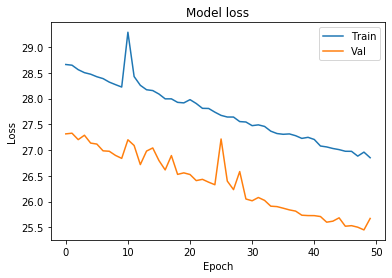

In [292]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

# Output

In [ ]:
#print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
#print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
#print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
y_pred = model.predict(X_pred)

In [ ]:
store_data['Total Yearly Income [EUR]'] = y_pred
store_data.to_csv('output6.csv', sep=',')